In [1]:
import colorstamps
import matplotlib.pyplot as plt
import numpy as np

In [2]:
colorbar_dict = {}

# Colormap pairs
This notebook generates colormap pairs

The colormaps are generated from the ‘CAM02-LCD’ colorspace as defined in the package colorspacious (https://pypi.org/project/colorspacious/)

https://github.com/trygvrad/colorstamps/ is used for easy access to this colorspace and visualization

In practice, we are are looking for two opposing vectors in the following colorspace:

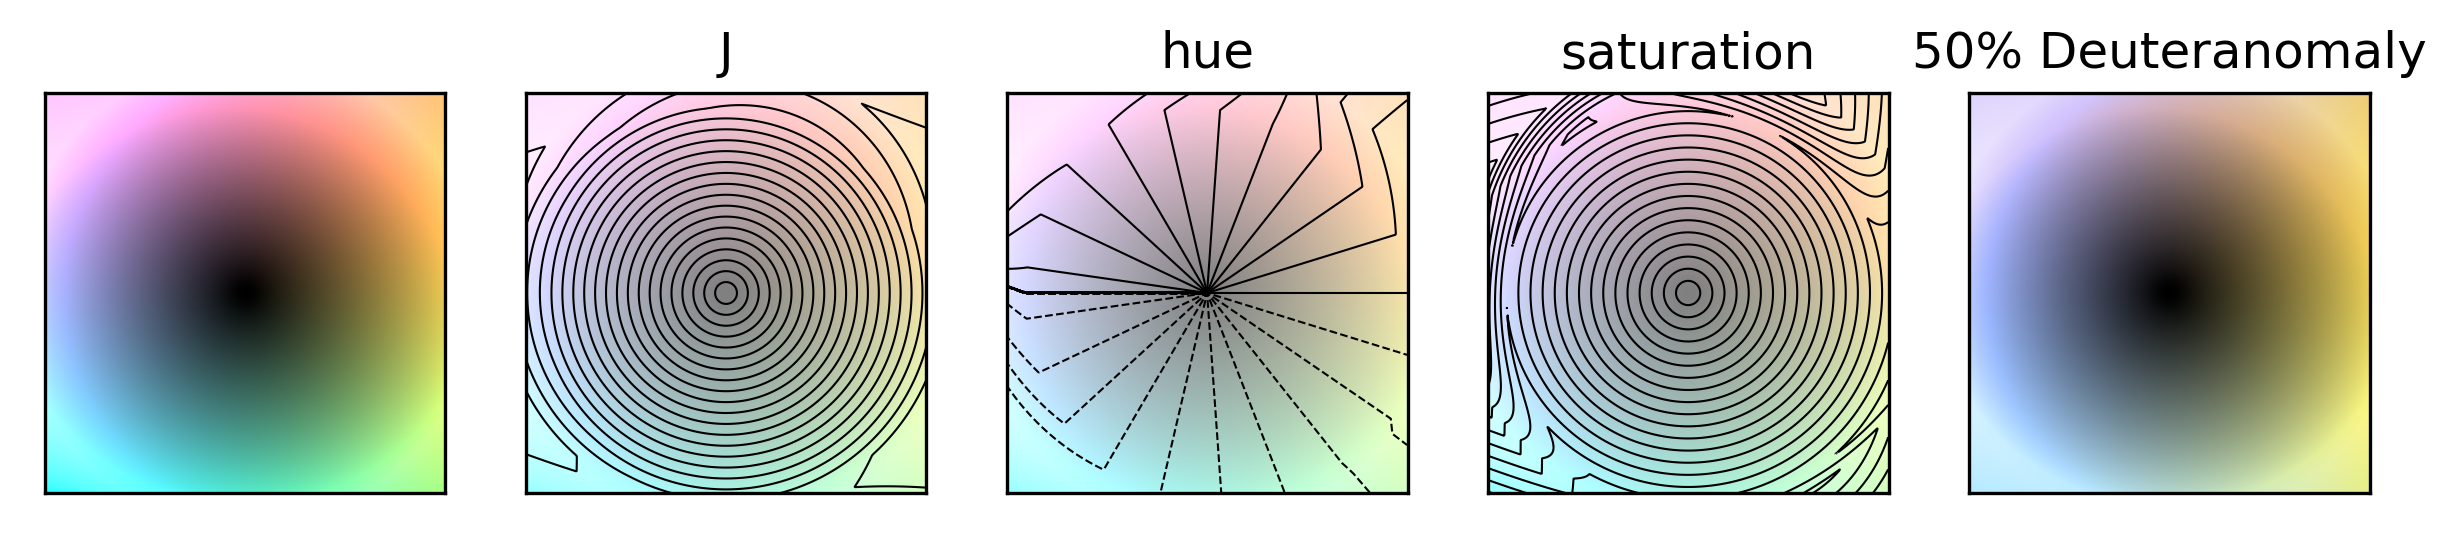

In [3]:
cmap = colorstamps.stamps.get_var_J(l = 512, J = (110,0))
stamp = colorstamps.Stamp(cmap)
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
stamp.eval(axes)

We need to find two vectors at 180° in this colorspace 

Once we have selected two vectors, we need to make sure they form a greyscale (r=g=b) on the diagonal

Since the vectors are defined at 180° in ‘CAM02-LCD’ colorspace this is not guaranteed, and we apply a correction for this

We also need to adjust the colormaps so that they start at (0,0,0) and end at (1,1,1) when combined)

We then extract the final colormaps from the 2D matrix


# Colorbars 2VarAddA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [0.95086084 1.01204688 0.92966455]
values <0: 0
values >1: 718
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.0789519  0.09410928 0.11022788]
 [0.1989484  0.23854331 0.27860993]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.10358472 0.08842734 0.07230874]
 [0.26301813 0.22342321 0.18335659]]


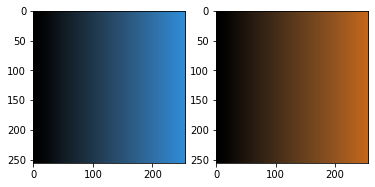

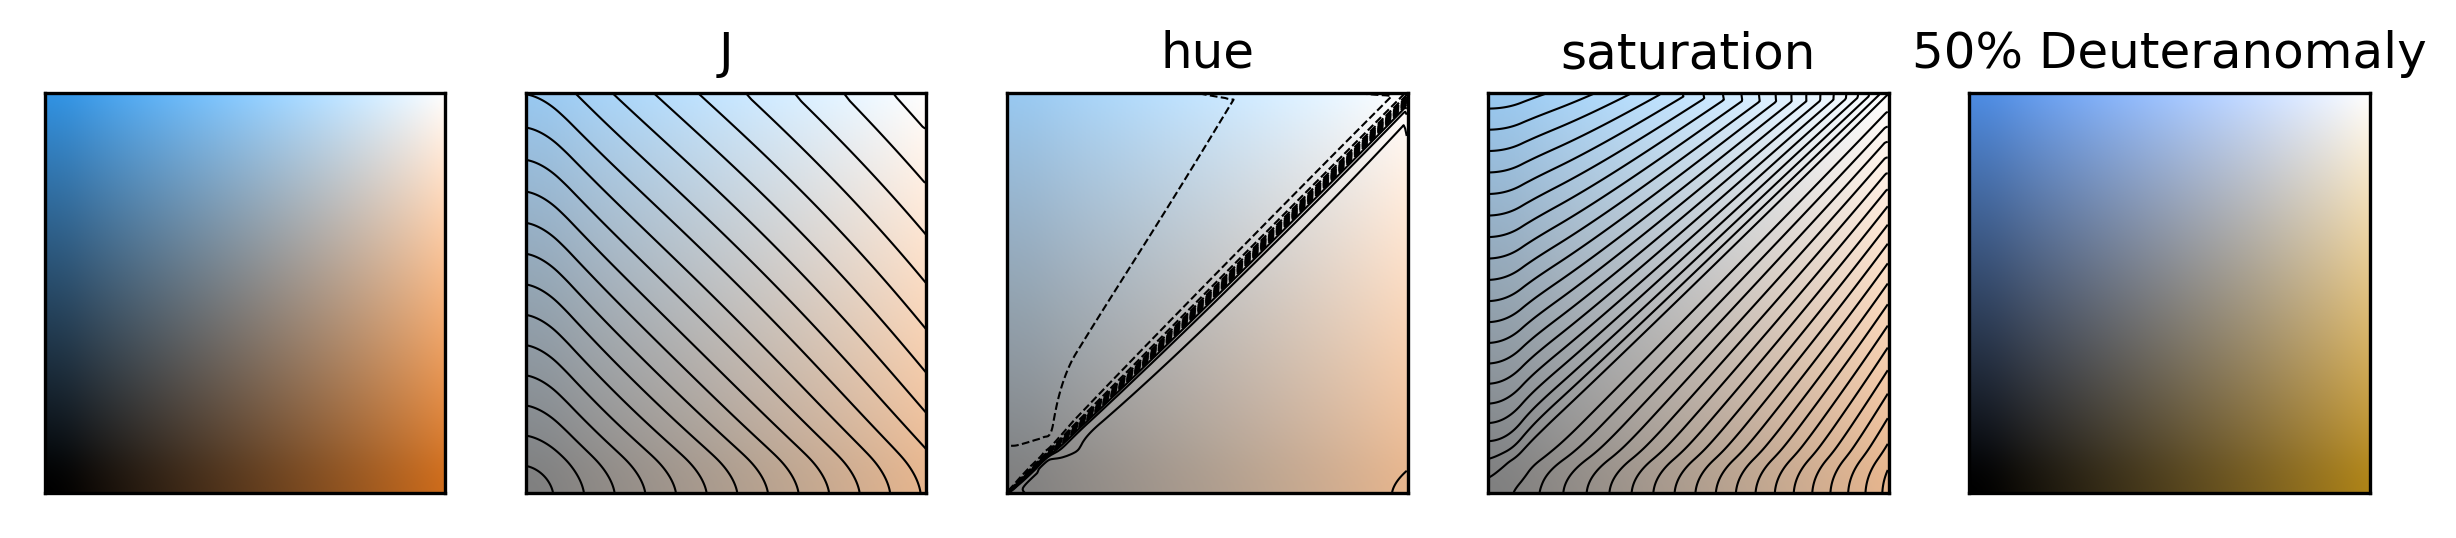

In [4]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6,0.75) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+180, r = radius)[256,:256]

print(f'max before adjustment: {cmap_1[0]+ cmap_0[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1# i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_1[i] + cmap_0[i])/3
    for j in range(3):
        d = k - (cmap_1[i,j] + cmap_0[i,j])
        cmap_1[i,j] += factor*d/2
        cmap_0[i,j] += factor*d/2
        
cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]

fig, axes = plt.subplots(1,2)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis]+ cmap_1[np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[255,255][np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['2VarAddA0'] = cmap[:,0]
colorbar_dict['2VarAddA1'] = cmap[0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['2VarAddA0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['2VarAddA1'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
colorstamps.Stamp(cmap + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 2Var_add_b

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [1.10027687 1.01802817 0.9865428 ]
values <0: 0
values >1: 66
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.07888246 0.0891137  0.07056277]
 [0.19972103 0.22513078 0.17747806]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.09138392 0.08115269 0.09970361]
 [0.2305452  0.20513545 0.25278817]]


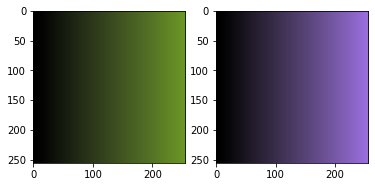

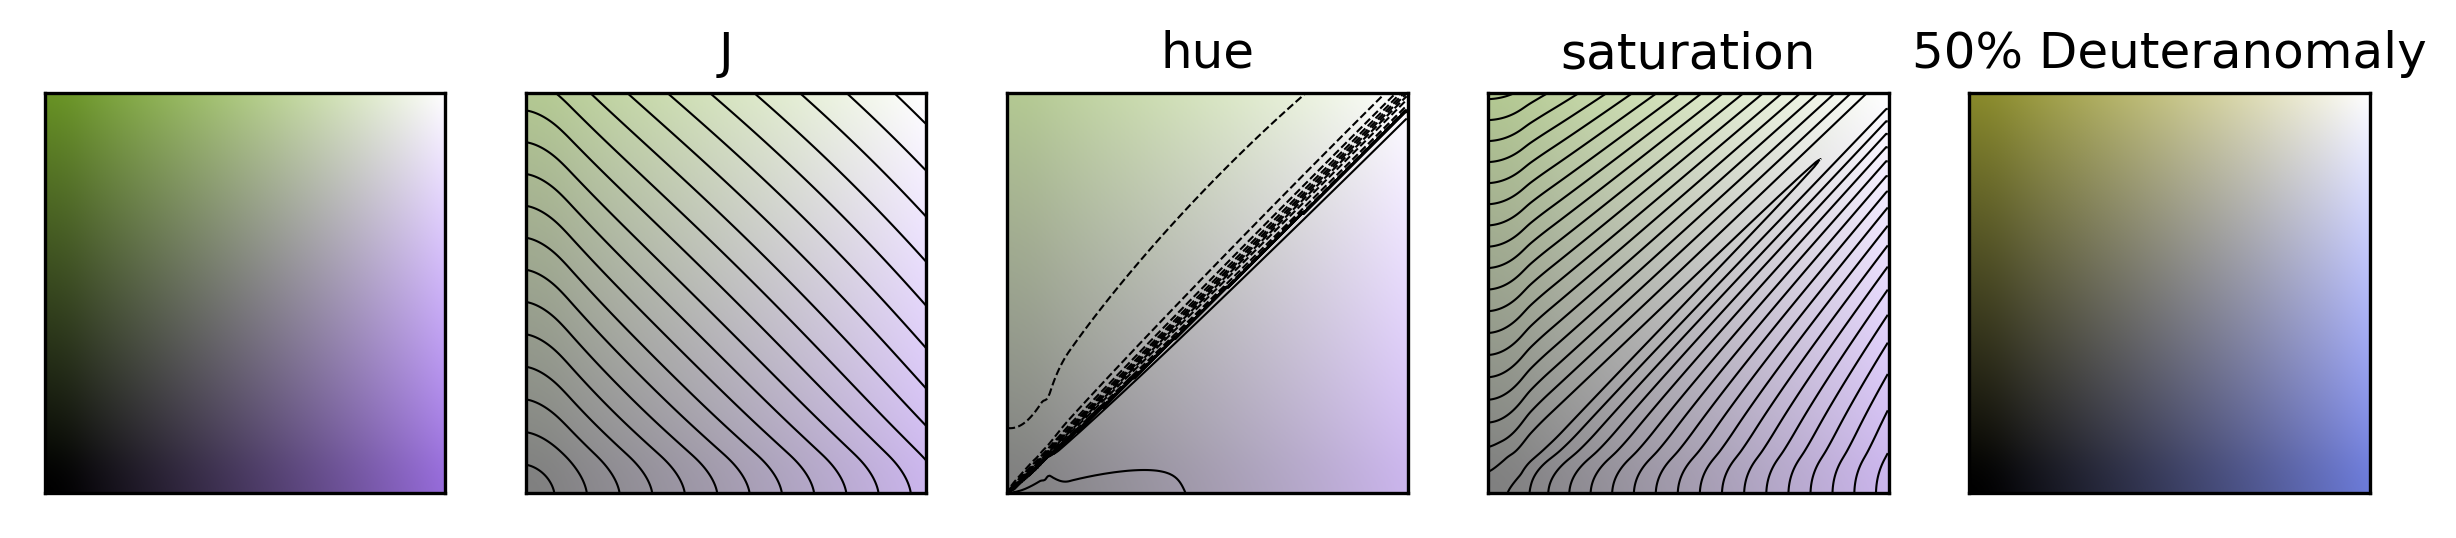

In [5]:
r = -30+180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6,0.75) # range in lightness  
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+180, r = radius)[256,:256]

print(f'max before adjustment: {cmap_1[0]+ cmap_0[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1# i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_1[i] + cmap_0[i])/3
    for j in range(3):
        d = k - (cmap_1[i,j] + cmap_0[i,j])
        cmap_1[i,j] += factor*d/2
        cmap_0[i,j] += factor*d/2
        
cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
fig, axes = plt.subplots(1,2)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis]+ cmap_1[np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[255,255][np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['2VarAddB0'] = cmap[:,0]
colorbar_dict['2VarAddB1'] = cmap[0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['2VarAddB0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['2VarAddB1'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
colorstamps.Stamp(cmap + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# The subtractive colorbars are based on a separate colorspace

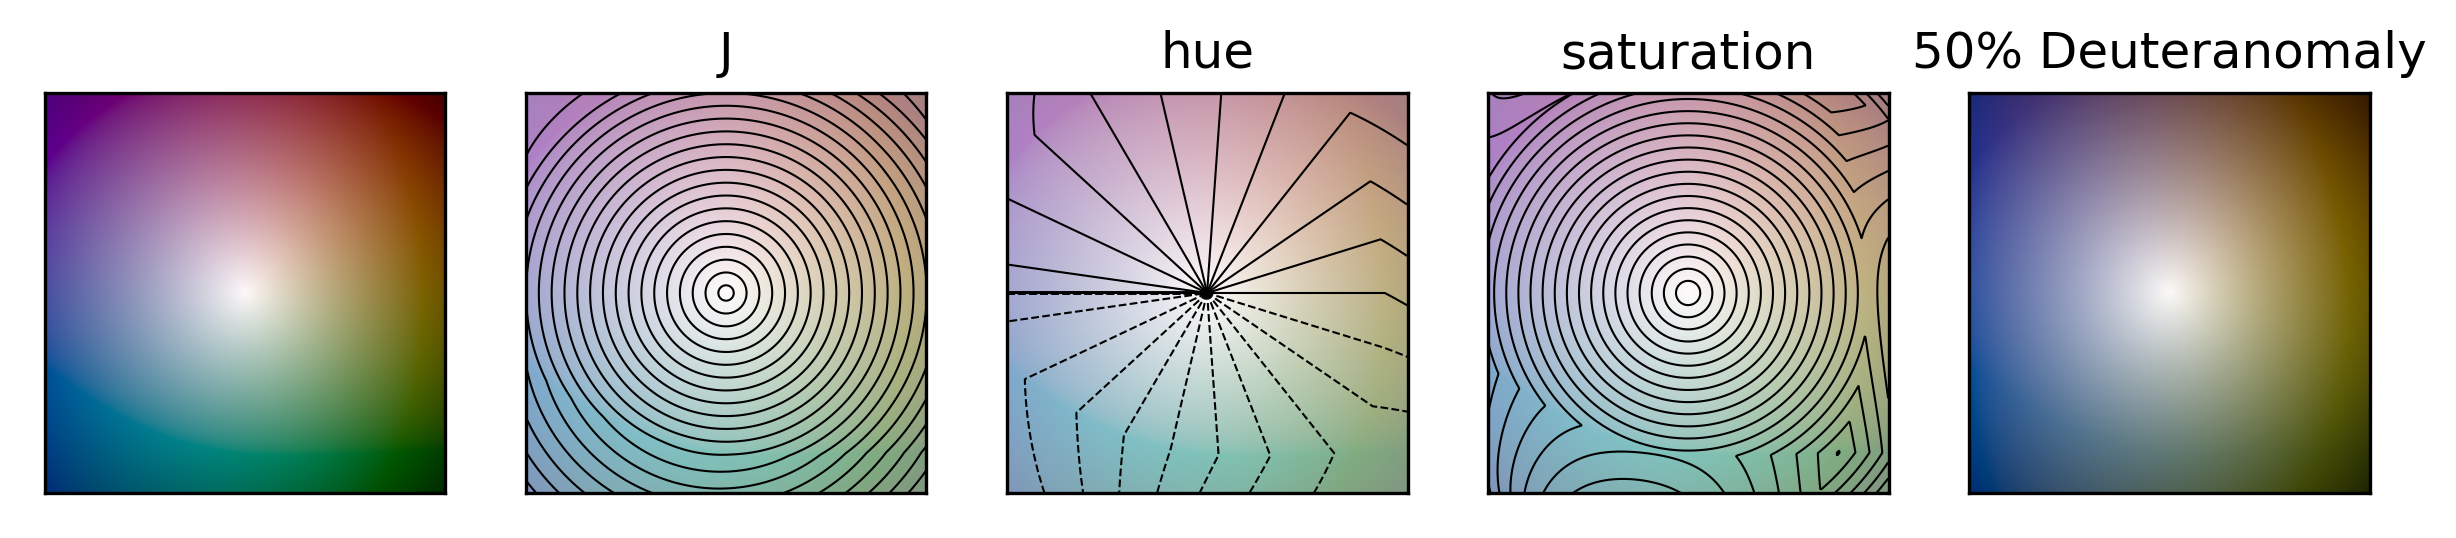

In [6]:
cmap = colorstamps.stamps.get_var_J(l = 512, J = (50,128))
stamp = colorstamps.Stamp(cmap)
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
stamp.eval(axes)

# Colorbars 2Var_sub_a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [0.95085568 1.01204318 0.92966051]
max in combination : [0.00549477 0.00549477 0.00549477]
values <0: 0
values >1: 0
check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.36946671 254.57333372 254.76945531]
 [253.67330406 254.10551778 254.50819512]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.69542765 254.49156064 254.29543905]
 [254.36248114 253.93026743 253.52759009]]


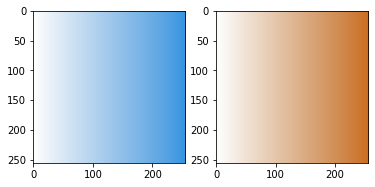

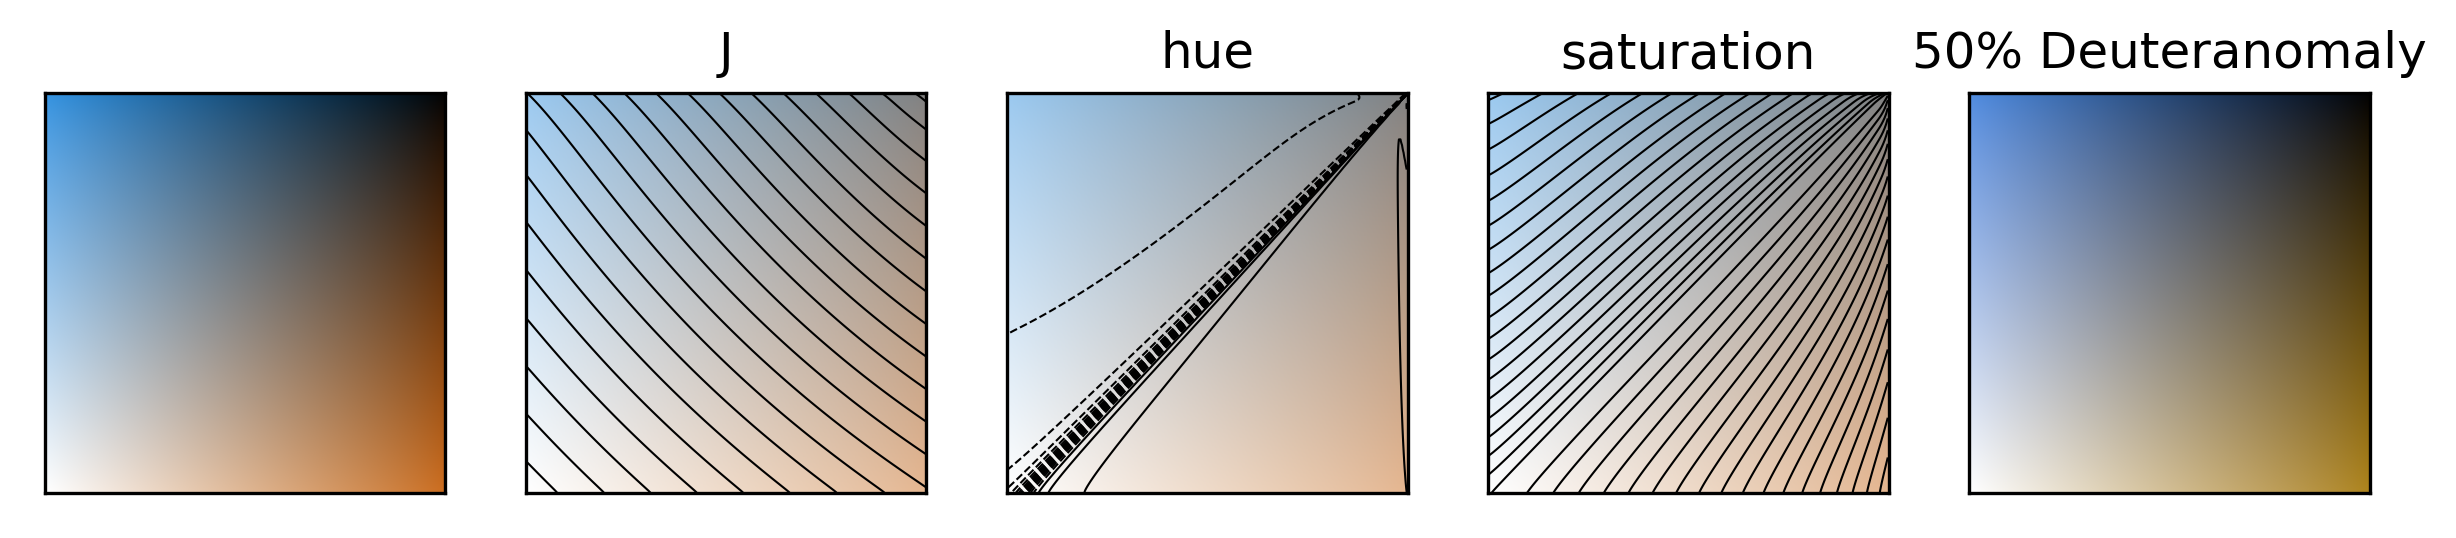

In [7]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6, 128)#(77.6,0.75) # range in lightness  
radius = 37        

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+180, r = radius)[256,:256]

print(f'max before adjustment: {cmap_1[0]+ cmap_0[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_1[i] + cmap_0[i])/3
    for j in range(3):
        d = k - (cmap_1[i,j] + cmap_0[i,j])
        cmap_1[i,j] += factor*d/2
        cmap_0[i,j] += factor*d/2

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]

fig, axes = plt.subplots(1,2)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))

# combine to a 2d color matrix
cmap = 1-(1-cmap_0[::-1,np.newaxis])-(1-cmap_1[np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0][np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,:] = 0

print('max in combination :', cmap[255,255])

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1



# select cbars
colorbar_dict['2VarSubA0'] = cmap[:,0]
colorbar_dict['2VarSubA1'] = cmap[0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['2VarSubA0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['2VarSubA1'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
colorstamps.Stamp(cmap + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 2Var_sub_b

max before adjustment: [1.10027318 1.01802431 0.98653881]
max in combination : [0.07616934 0.07616934 0.07616934]
values <0: 0
values >1: 0
check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.46686572 254.58346793 254.32758449]
 [253.88013107 254.11988302 253.58116495]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.60241155 254.48580934 254.74169278]
 [254.15711002 253.91735806 254.45607613]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


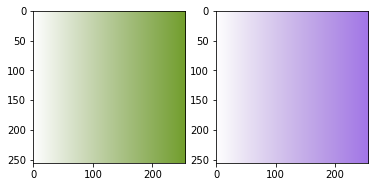

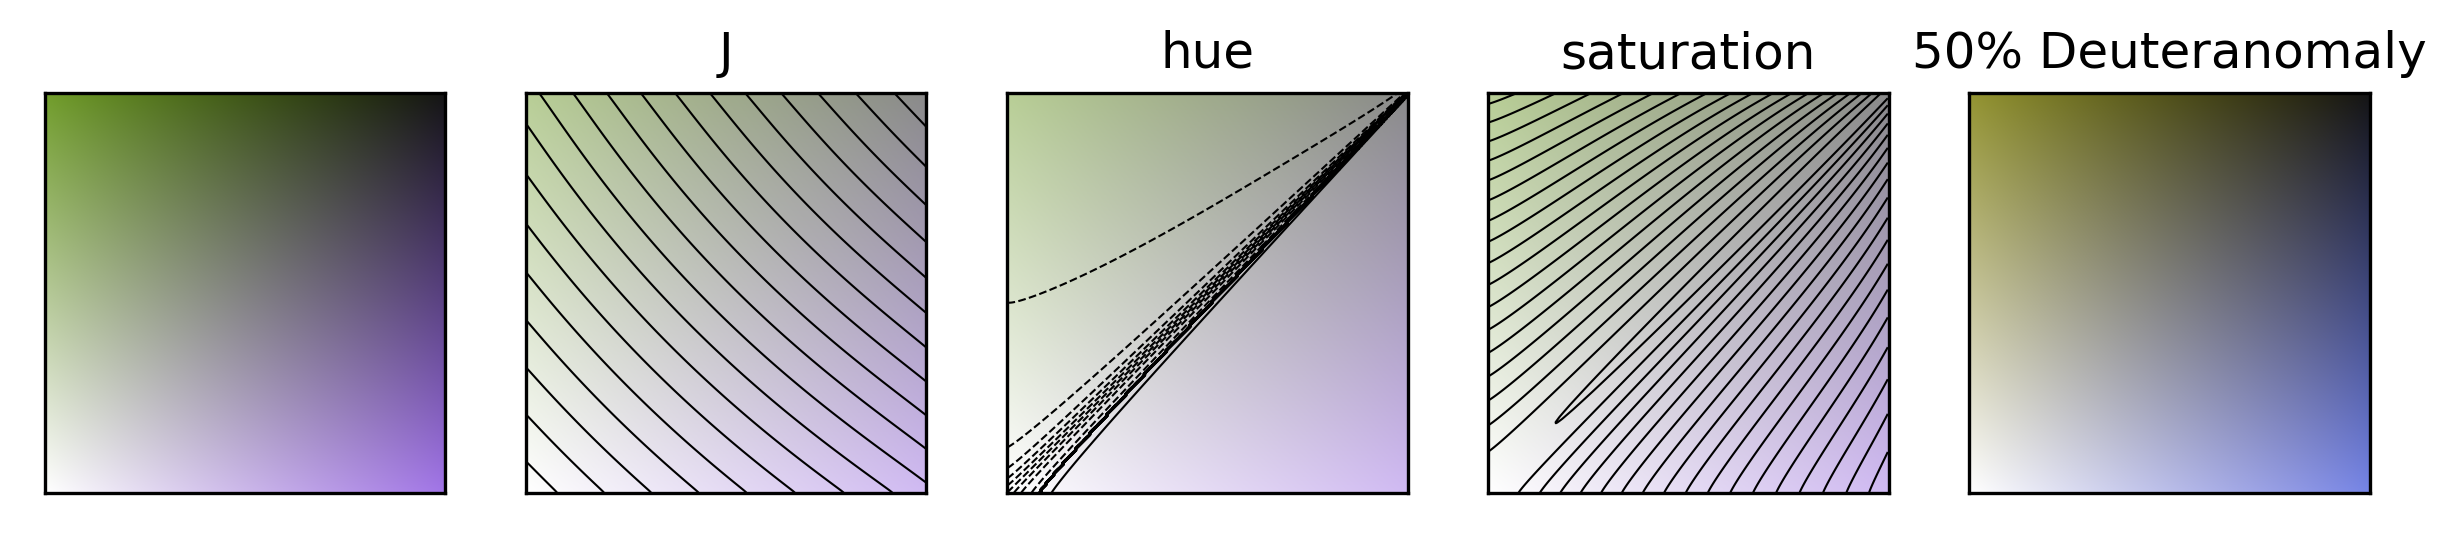

In [8]:
r = -30+180 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6, 128)#(77.6,0.75) # range in lightness 
radius = 37        

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+180, r = radius)[256,:256]

print(f'max before adjustment: {cmap_1[0]+ cmap_0[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_1[i] + cmap_0[i])/3
    for j in range(3):
        d = k - (cmap_1[i,j] + cmap_0[i,j])
        cmap_1[i,j] += factor*d/2
        cmap_0[i,j] += factor*d/2

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]

fig, axes = plt.subplots(1,2)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))

# combine to a 2d color matrix
cmap = 1-(1-cmap_0[::-1,np.newaxis])-(1-cmap_1[np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0][np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,:] = 0

print('max in combination :', cmap[255,255])

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1



# select cbars
colorbar_dict['2VarSubB0'] = cmap[:,0]
colorbar_dict['2VarSubB1'] = cmap[0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['2VarSubB0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['2VarSubB1'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
colorstamps.Stamp(cmap + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# resulting colorbars:

In [9]:
colorbar_dict.keys()

dict_keys(['2VarAddA0', '2VarAddA1', '2VarAddB0', '2VarAddB1', '2VarSubA0', '2VarSubA1', '2VarSubB0', '2VarSubB1'])

In [10]:
import pickle

with open(r"2vars.pickle", "wb") as output_file:
    pickle.dump(colorbar_dict, output_file)